# Hotel Booking 

### Libraries 

In [249]:
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import graphviz
import dtale
import phik
from phik import resources, report

import pandas_profiling
from pandas_profiling import ProfileReport

from numpy import quantile, where, random

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2 as chis2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
import logging
from sklearn.cluster import KMeans
logging.getLogger('matplotlib').setLevel(logging.ERROR)

## Collect Initial Data

Loading the data : 

In [3]:
data = pd.read_csv("H2.csv")

In [4]:
df = data.copy()

#### Features
- ADR : Average Daily Rate (num)
- Adult : Nmb of adults (num)
- Agent : ID travel agency that made the booking (cat)
- ArrivalDateDayOfMonth : Day of the month of the arrival date (num)
- ArrivalDateMonth : Month of arrival date with 12 categories: “January” to “December” (cat)
- ArrivalDateWeekNumber : Week number of the arrival date 
- ArrivalDateYear :Year of the arrival date
- AssignedRoomType : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons (cat)
- Babies : Number of babies (num) 
- BookingChanges : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation (num)
- Children : nb of children (num)
- Company : ID of the company/entity that made the booking or responsible for paying the booking.(cat)
- Country : country of origin Categories are represented in the ISO 3155-3:2013 format (cat)
- CustomerType : Type of booking, assuming one of four possible categories (presented below) (cat)
- DaysInWaitingList : Number of days the booking was in the waiting list before it was confirmed to the customer (num)
- DepositType : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories (presented) (cat)
- DistributionChannel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” (cat)
- IsCanceled : Value indicating if the booking was canceled (1) or not (0)(cat)
- IsRepeatedGuest :Value indicating if the booking name was from a repeated guest (1) or not (0) (cat)
- LeadTime Number of days that elapsed between the entering date of the booking and the arrival date (num)
- MarketSegment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” (cat)
- Meal : Type of meal booked. Categories are presented in standard hospitality meal packages (presented below) (cat)
- PreviousBookingsNotCanceled : Number of previous bookings not cancelled by the customer prior to the current booking (num)
- PreviousCancellations :Number of previous bookings that were cancelled by the customer prior to the current booking (num)
- RequiredCarParkingSpaces : Number of car parking spaces required by the customer (num)
- ReservationStatus : Reservation last status, assuming one of three categories (presented below) (cat)
- ReservationStatusDate : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel (date)
- ReservedRoomType :Code of room type reserved (cat)
- StaysInWeekendNights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel (nim)
- StaysInWeekNights :Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel (num)
- TotalOfSpecialRequests : Number of special requests made by the customer (e.g. twin bed or high floor) (num)


In [100]:
df["MarketSegment"].unique()

array(['Offline TA/TO', 'Online TA', 'Groups', 'Complementary', 'Direct',
       'Corporate', 'Undefined', 'Aviation'], dtype=object)

In [3]:
df.head(15)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [198]:
dtale.show(df,ignore_duplicate=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


In [11]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [19]:
df.duplicated().sum() #disregard and treat it as seperate clients

25902

In [ ]:
# Company 75000+ NULL a drop ? and keep agent
# RequiredCarParkingSpaces 98% 0 a drop ? 
# ArrivalDateMonth Turn into Jan=1, Feb=2 etc.
# Binary : IsCanceled IsRepeatedGuest
# ONEHOTENCODING of categorical : Meal, Market segment, DistributionChannel, DepositType
# Long/Lati of country for numerical ? OR DROP
# see differences between AssignedRoomType and ReservedRoomType ? 
# Country has 24 Nan --> put mode : PRT or delete ? AND Children -> 4 nan
#Babies has 10 and 9 (outliers should be deleted)

# IsCanceled = TARGET

In [5]:
non_metric_features = []
metric_features = []
for col in list(df.columns):
    if df[col].dtype=='object':
        non_metric_features.append(col)
    else:
        metric_features.append(col)

In [6]:
metric_features.remove("IsCanceled")
metric_features.remove("IsRepeatedGuest")

In [7]:
non_metric_features.append("IsRepeatedGuest")

In [8]:
# IsCanceled = Target
df.rename(columns={"IsCanceled" : "y"}, inplace=True)

In [9]:
df.head()

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## Data Exploration

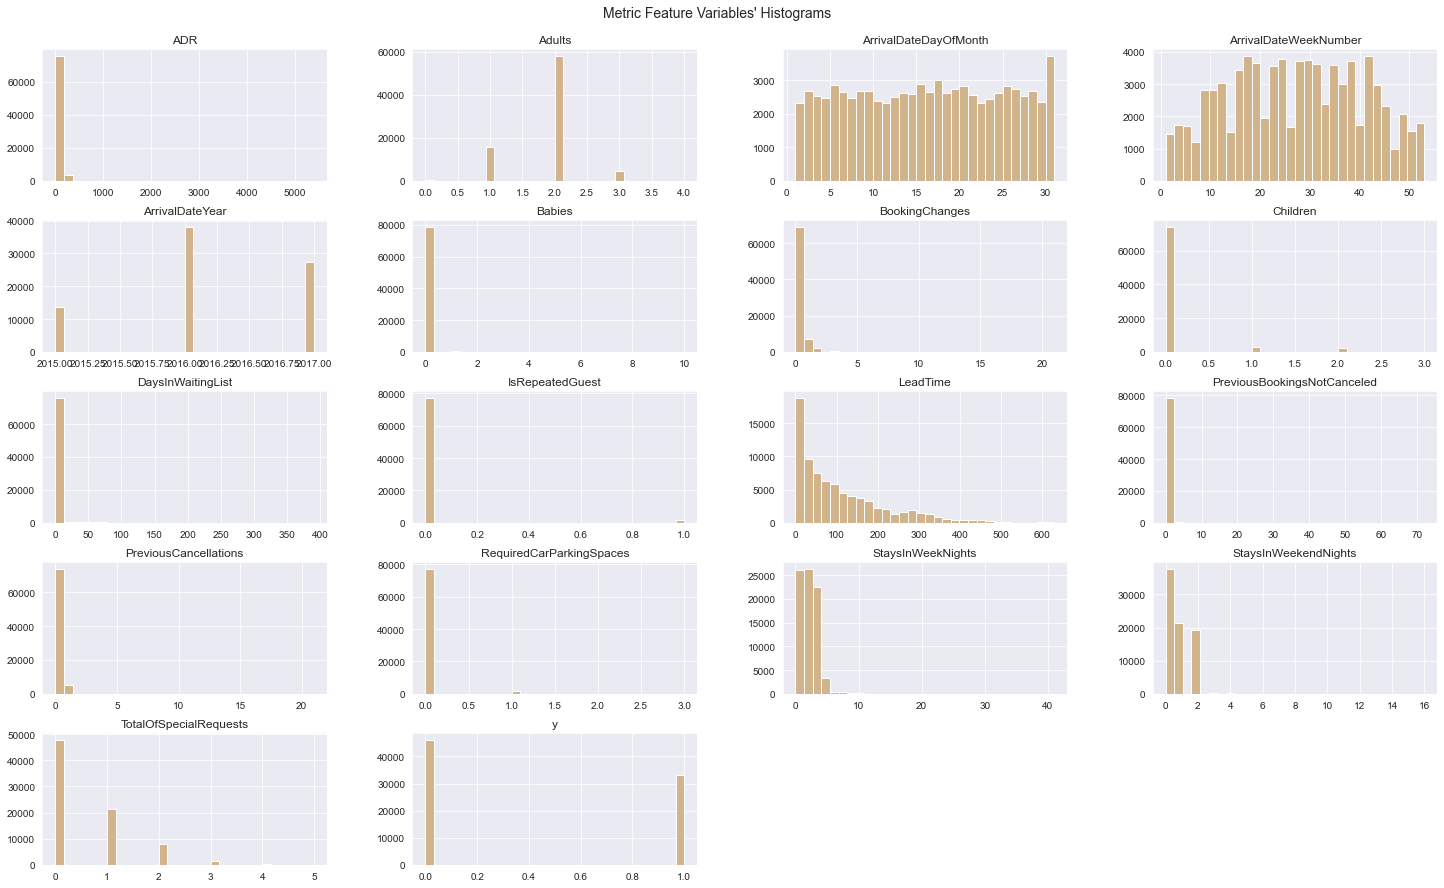

In [21]:
sns.set_style("darkgrid")
df.hist(figsize=(25,15),bins=30,xlabelsize=10,ylabelsize=10, color="tan")
title = "Metric Feature Variables' Histograms"
plt.suptitle(title, y=0.92, fontsize=14)
plt.show()

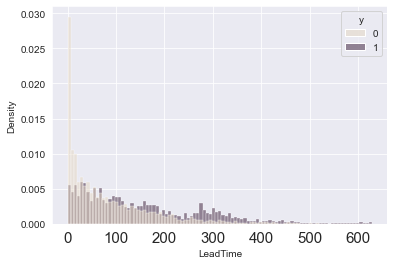

In [38]:
sns.histplot(x=df["LeadTime"], hue=df['y'], stat='density', common_norm=False, palette="ch:.25")

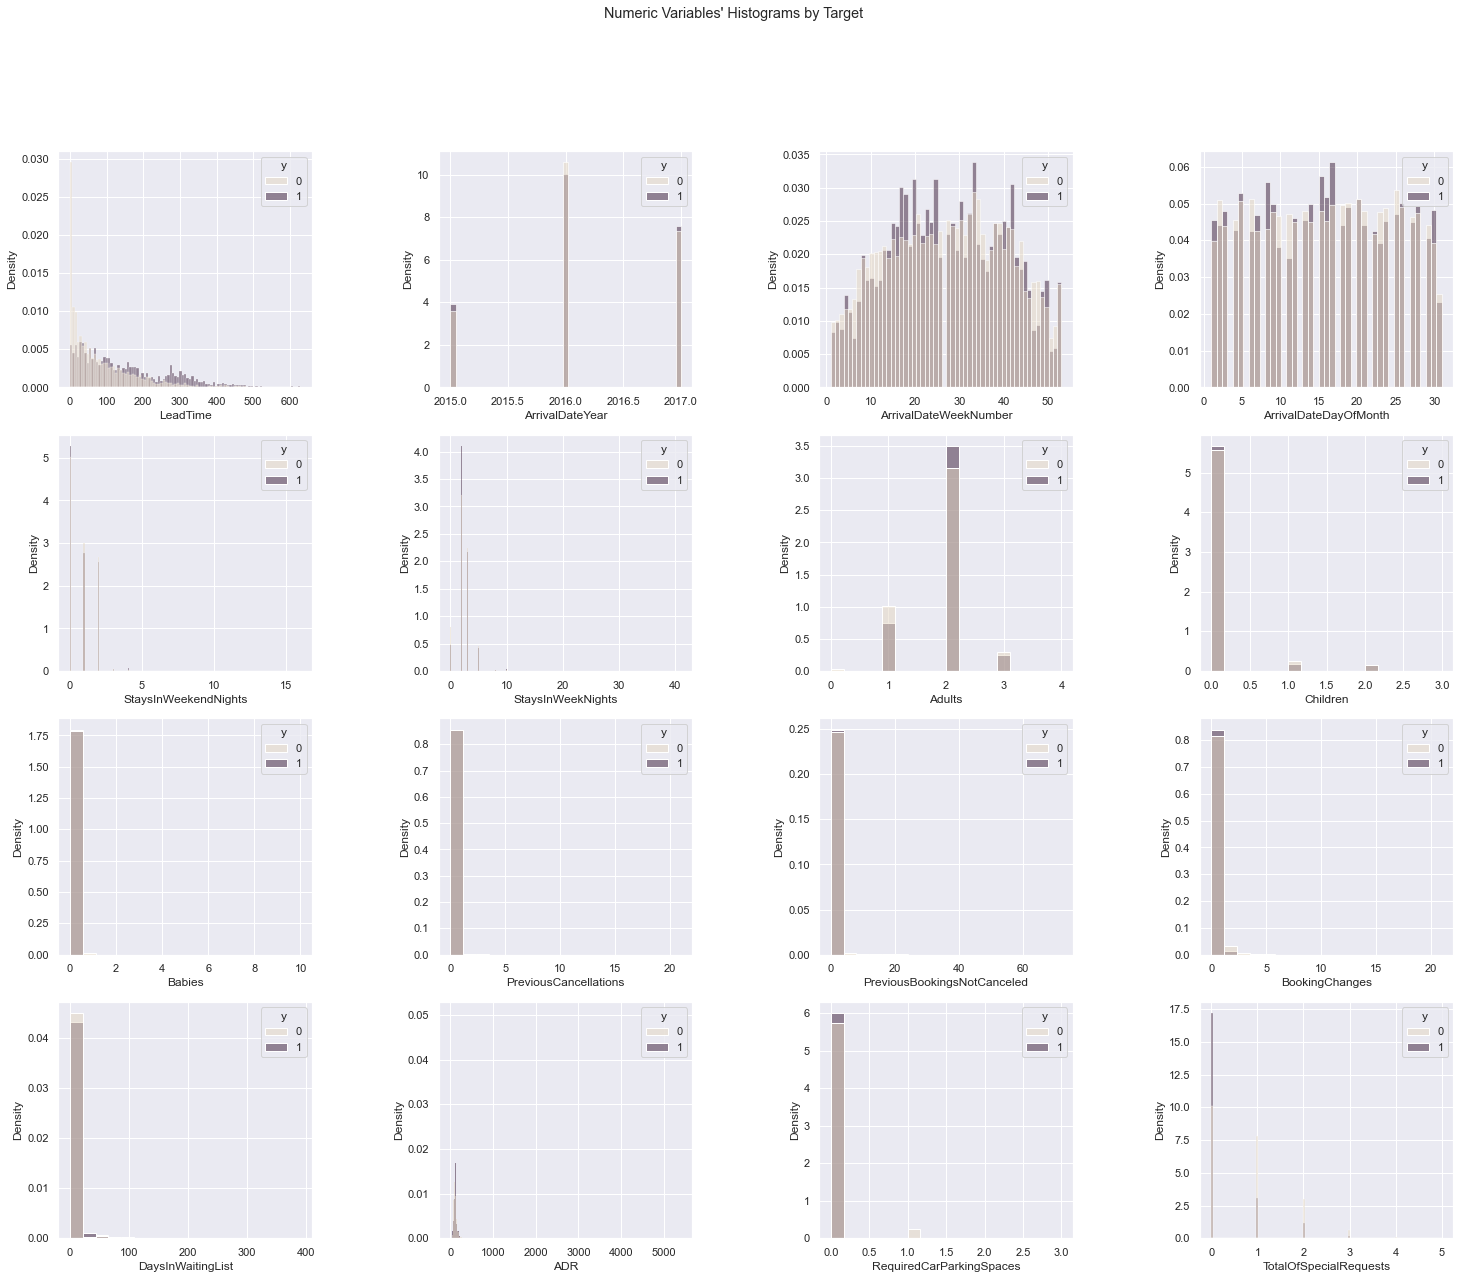

In [42]:
sns.set()

fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(25, 20))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], hue=df['y'], stat='density', common_norm=False, ax=ax, palette="ch:.25")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.5)

plt.show()

In [19]:
small_features2 = non_metric_features.copy()
small_features2.remove("Country")
small_features2.remove("ReservationStatusDate")
small_features2.remove("Agent")
small_features2.remove("Company")

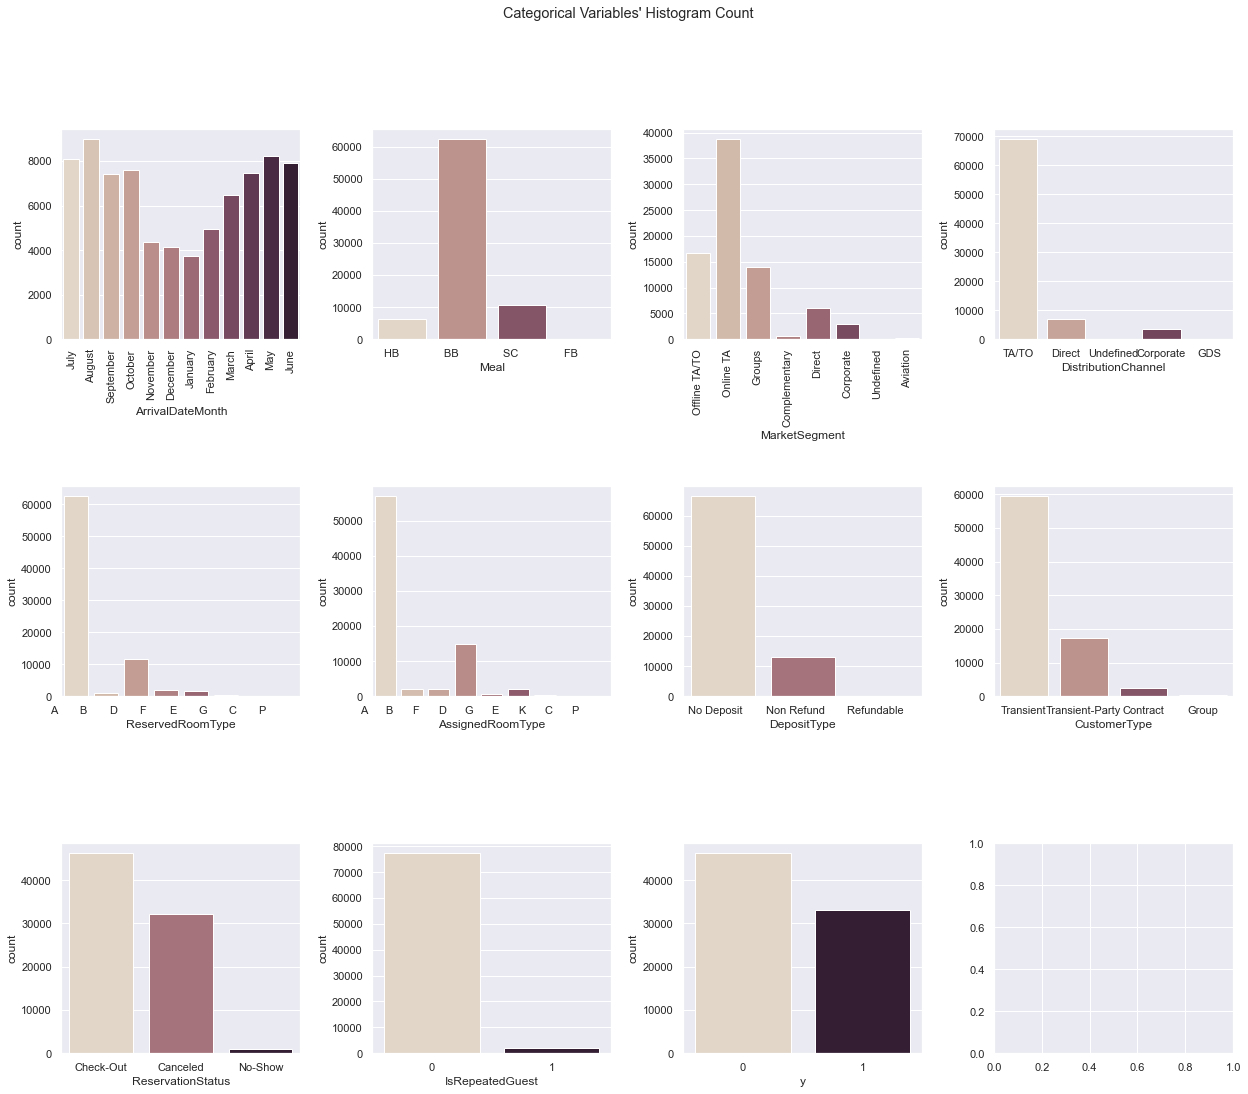

In [45]:
sns.set()

features = small_features2 + ['y']

fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=df[feat], ax=ax, palette="ch:.25")

title = "Categorical Variables' Histogram Count"
plt.suptitle(title)

axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

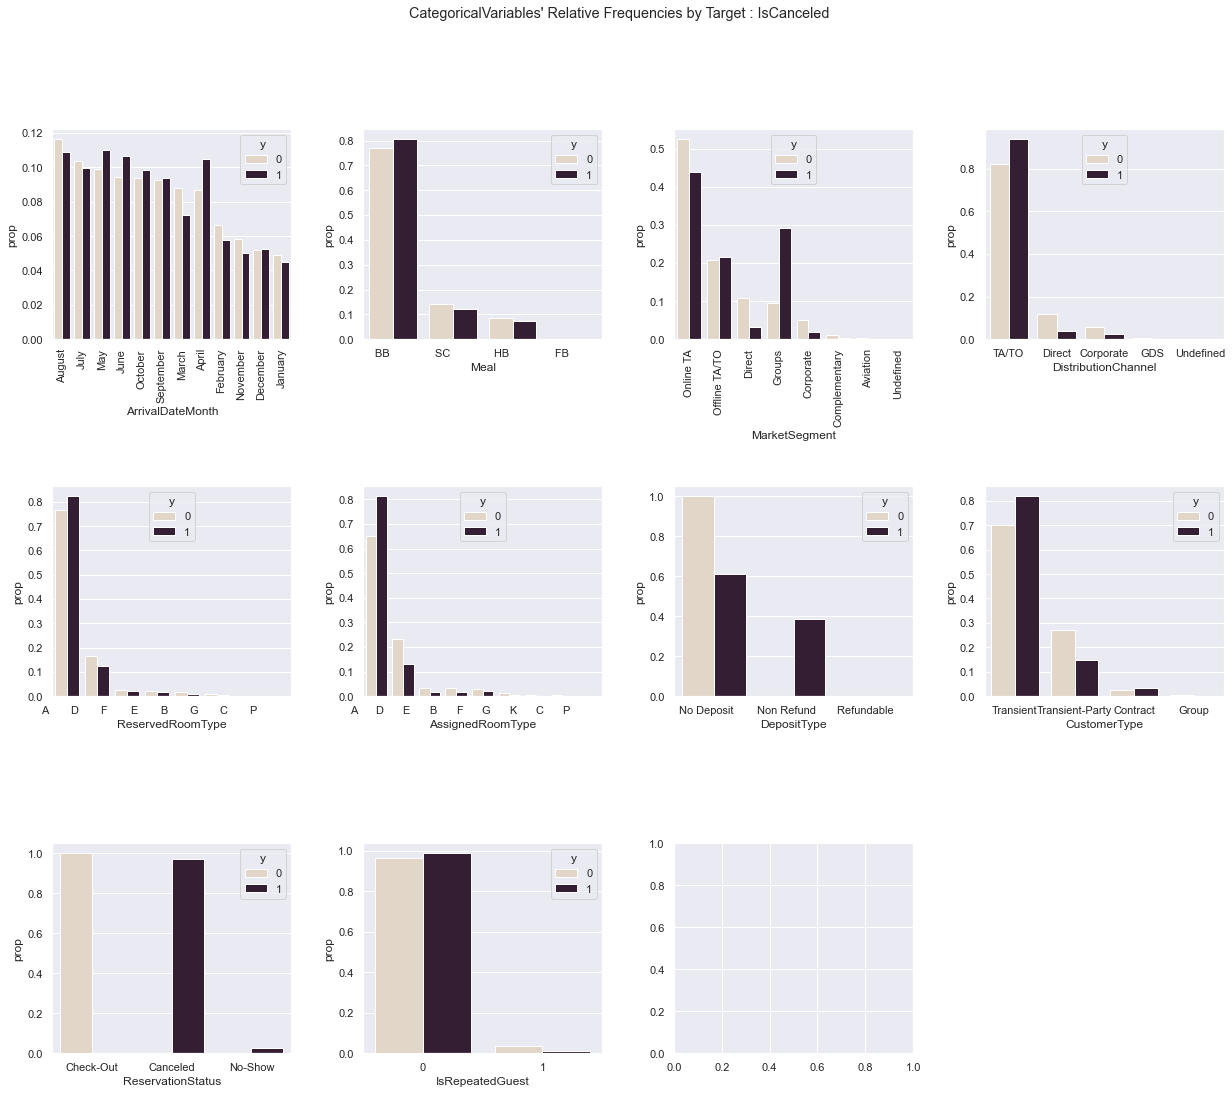

In [47]:
sns.set()

features = small_features2

fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))


for ax, feat in zip(axes.flatten(), features):
    data = df.groupby(['y'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='y', ax=ax,palette="ch:.25")

title = "CategoricalVariables' Relative Frequencies by Target : IsCanceled"
plt.suptitle(title)


axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

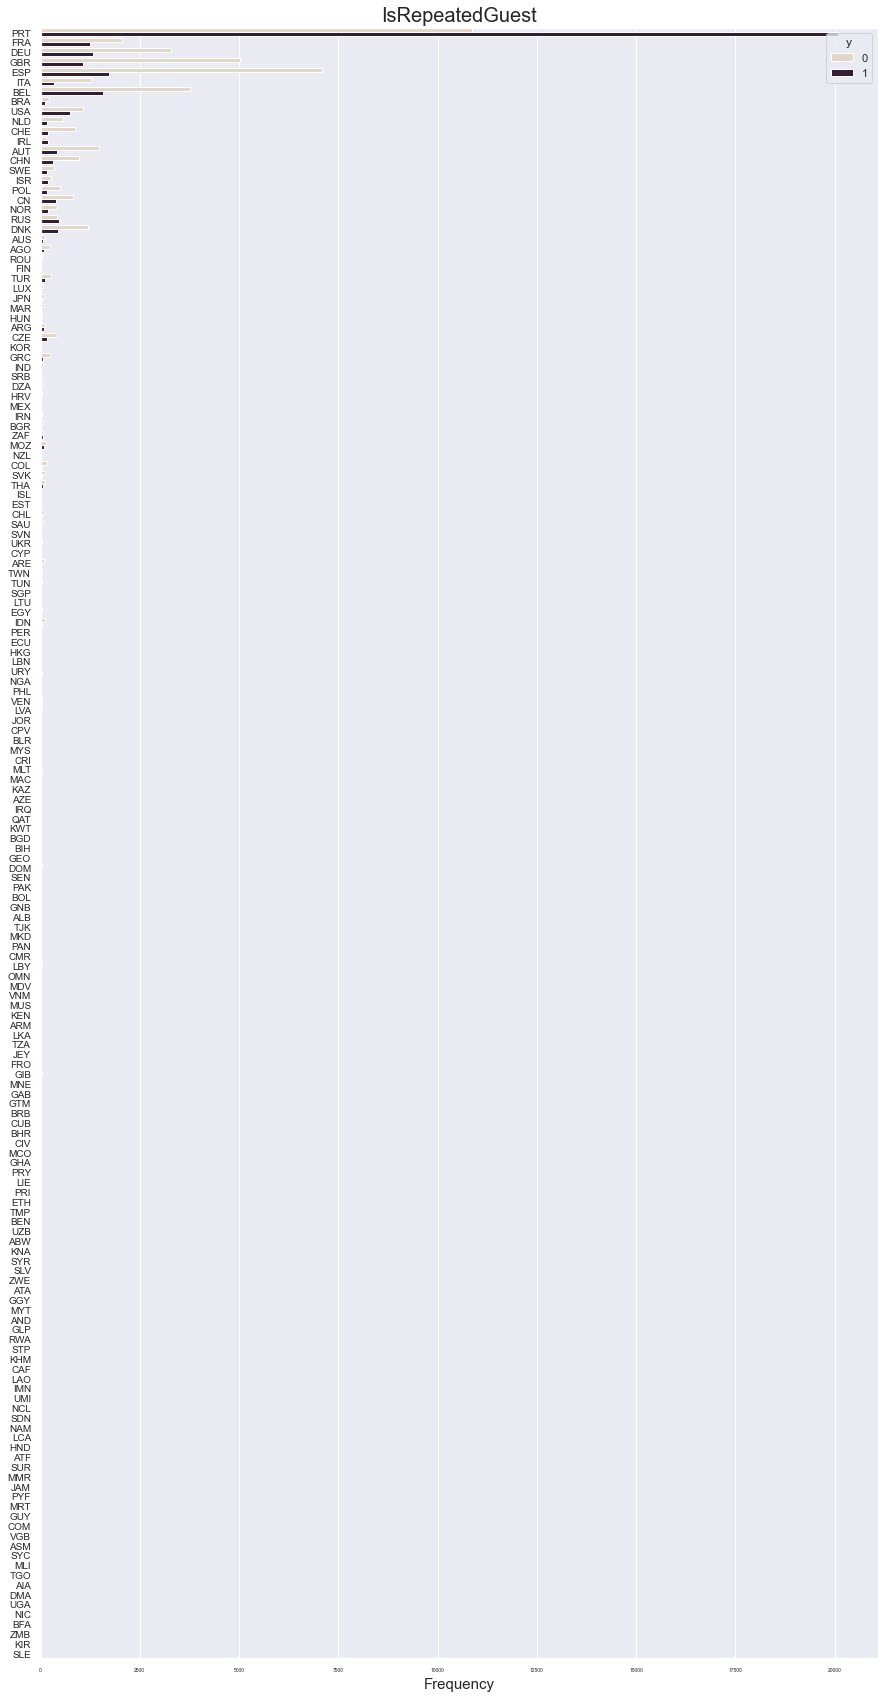

In [61]:
plt.figure(figsize=(15,30))
plt.title(i,fontsize=20)

axes=sns.countplot(y=df["Country"], hue=df["y"],palette="ch:.25")
axes.set_yticklabels(list(df["Country"].value_counts().index), size=10)
    
plt.rc('xtick',labelsize=5) 
plt.rc('ytick',labelsize=3) 
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('')
plt.show()

In [53]:
# Pairwise Relationship of Numerical Variables
sns.set()
features = metric_features +["y"]

# Setting pairplot
sns.pairplot(data=df[features], hue='y', diag_kind="hist", palette="ch:.25")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fec13080ca0> (for post_execute):


KeyboardInterrupt: 

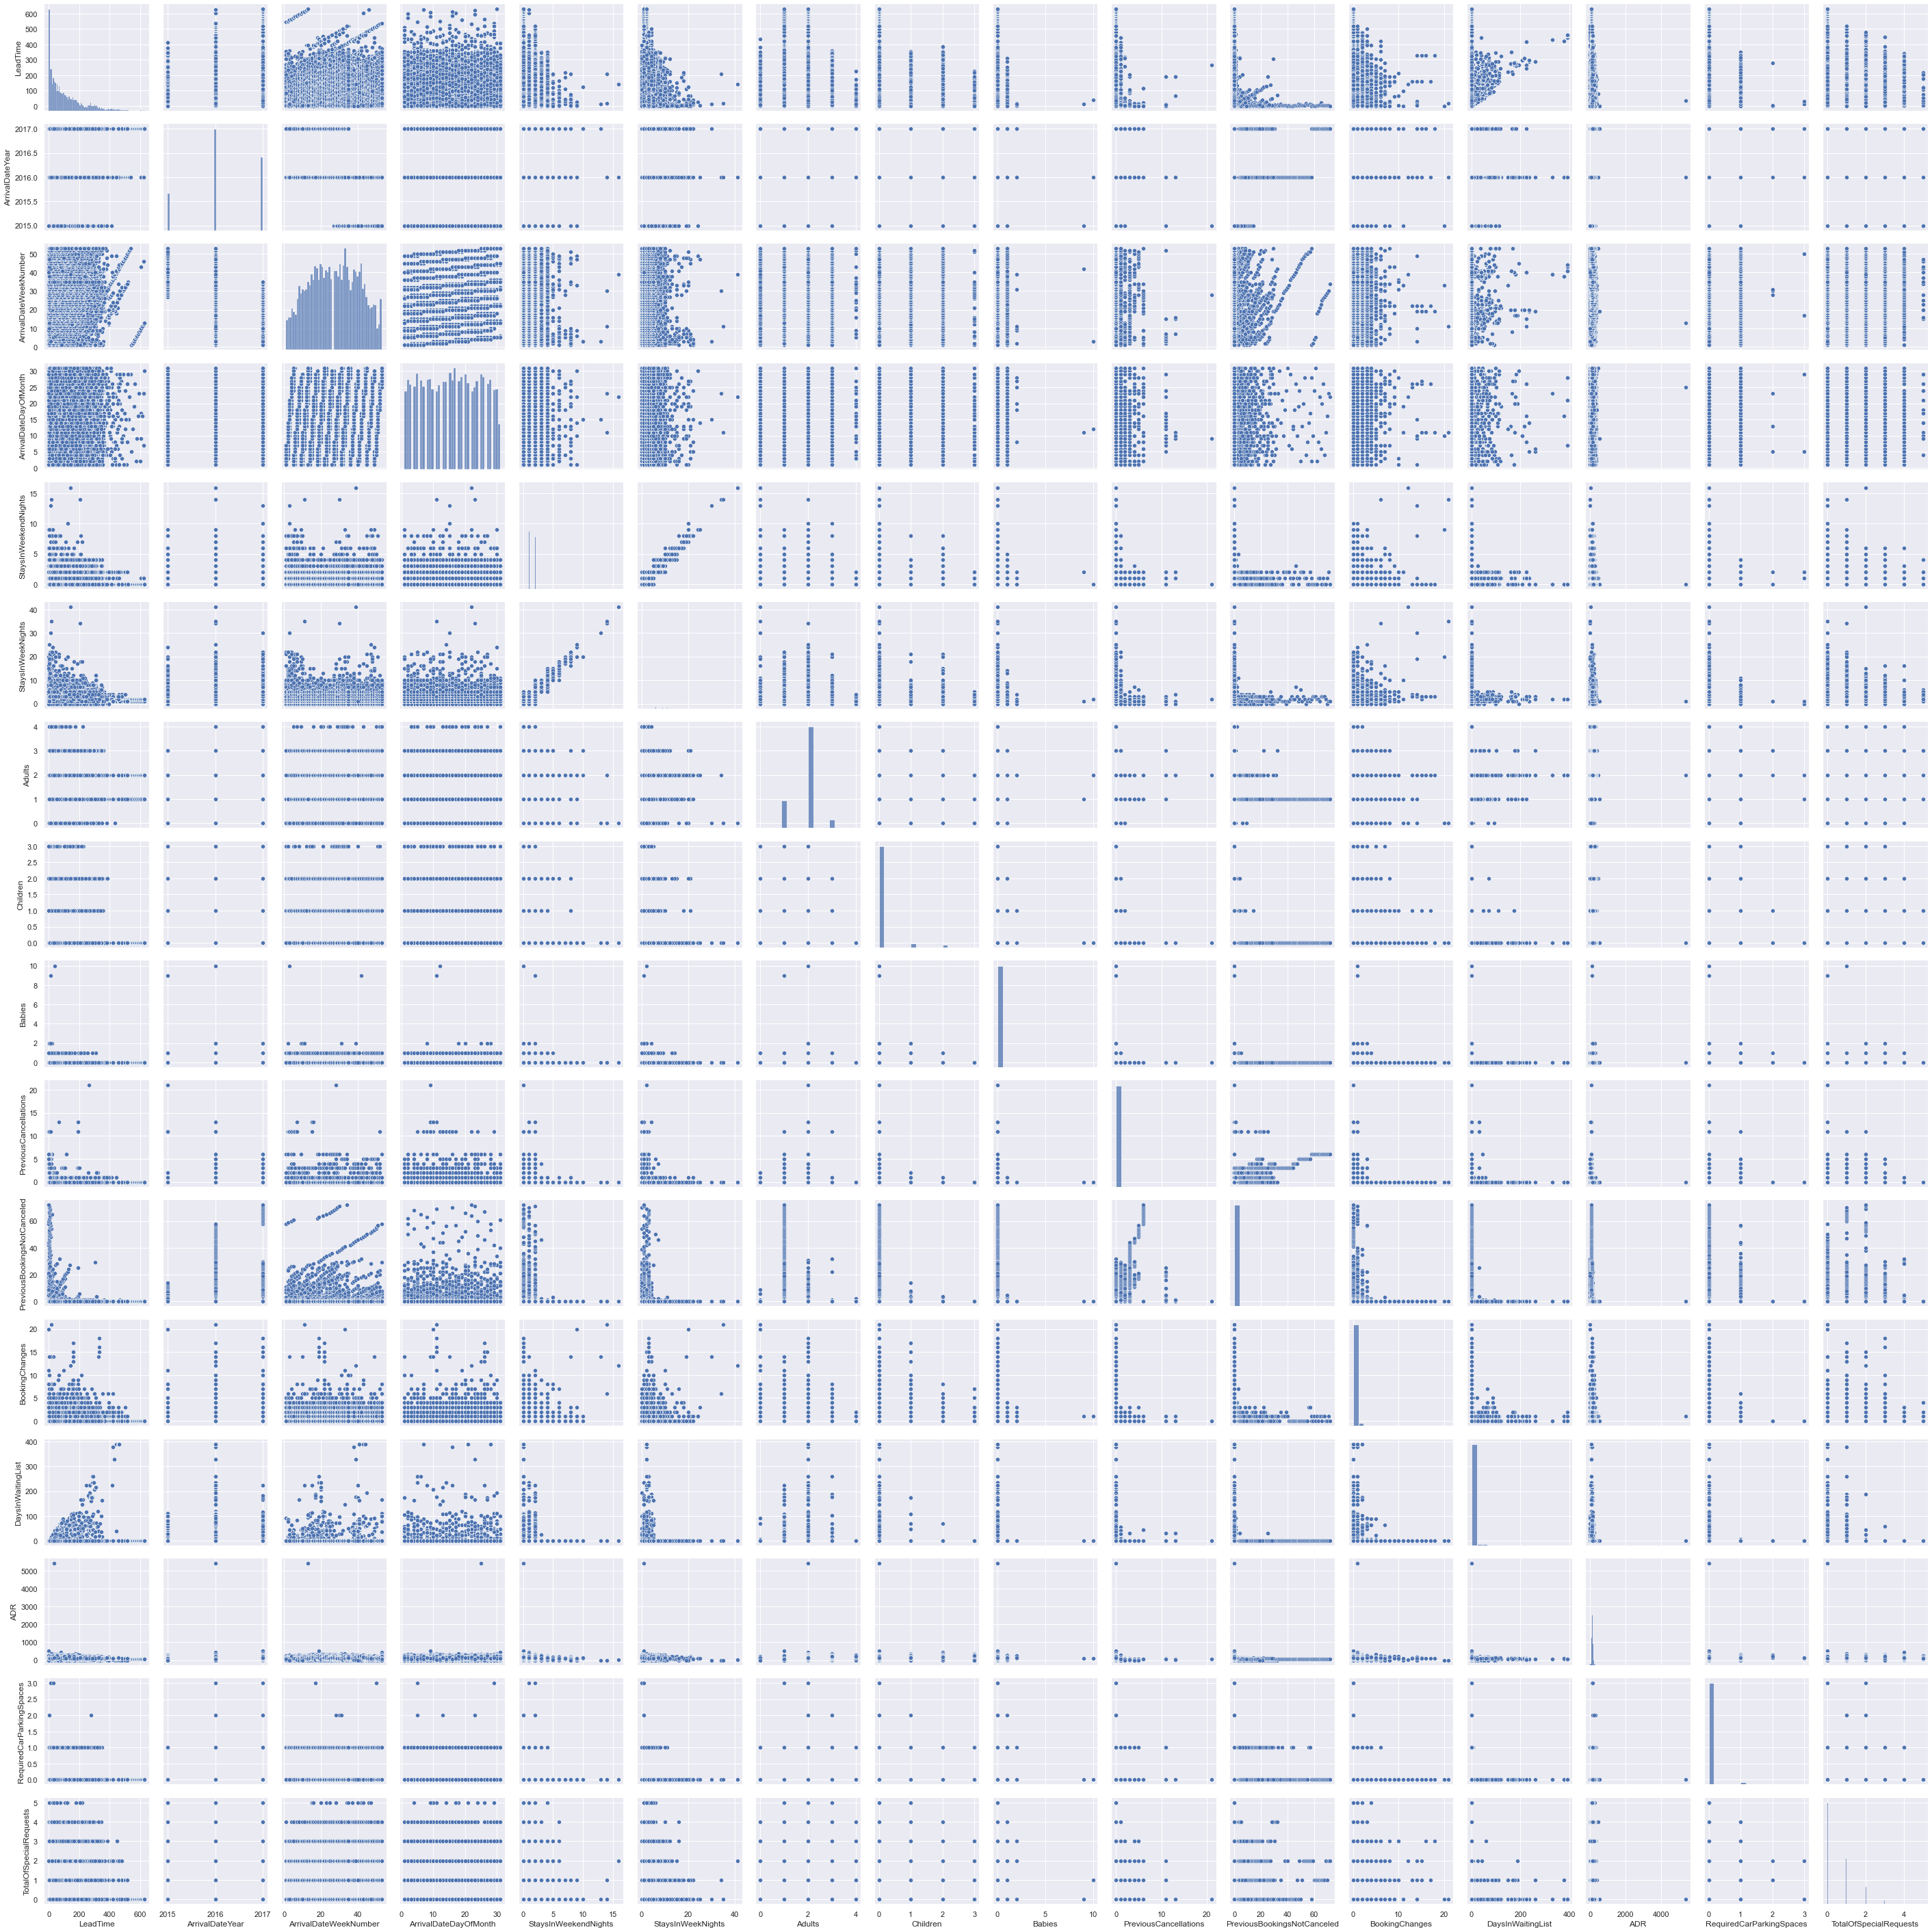

In [89]:
sns.pairplot(df[metric_features])
plt.show()

In [68]:
#getting phi_k correlation matrix from pandas profiling
def get_phi_k_corr(df,title):
    profile=ProfileReport(df.iloc[:,:], title=title)
    phi_k=pd.DataFrame([])
    dict=profile.description_set
    for keys,values in dict.items():
            try:
                for keys_ in dict.get(keys).keys():
                    try:
                        if keys_=='phi_k':
                            phi_k= pd.concat([phi_k,dict.get(keys).get(keys_)])
                    except AttributeError as e:
                        pass
            except AttributeError as e:
                pass
    return phi_k    

#print correlation matrix
def print_corr_matrix(df,title):
    plt.title(title, size=20)
    mask = np.triu(np.ones_like(df, dtype=np.bool))
    sns.set(rc={'figure.figsize':(15,8)})
    sns.heatmap(df, xticklabels=df.columns, yticklabels=df.columns, annot=True, 
                linewidths=.5, vmin = -1.0, vmax = 1.0, mask = mask,
                cmap=sns.diverging_palette(-10, 240, sep=70, n=7), fmt='.2')
    plt.show()

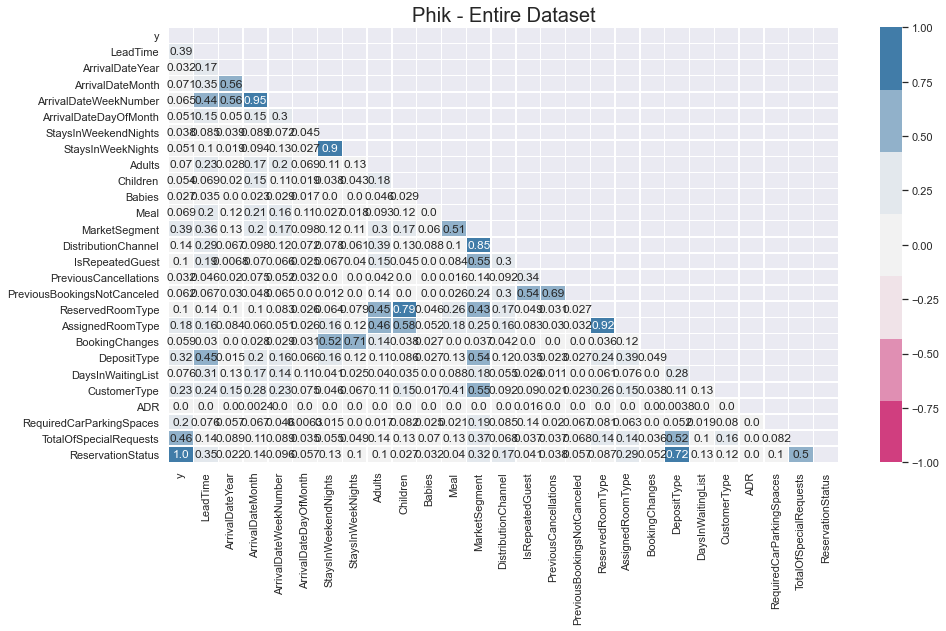

In [69]:
#Get correlation matrix
phi_k=get_phi_k_corr(df,'')
#Print matrix
print_corr_matrix(phi_k,'Phik - Entire Dataset')

In [76]:
metric_features_Y = metric_features + ["y"]

interval columns not set, guessing: ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'y']


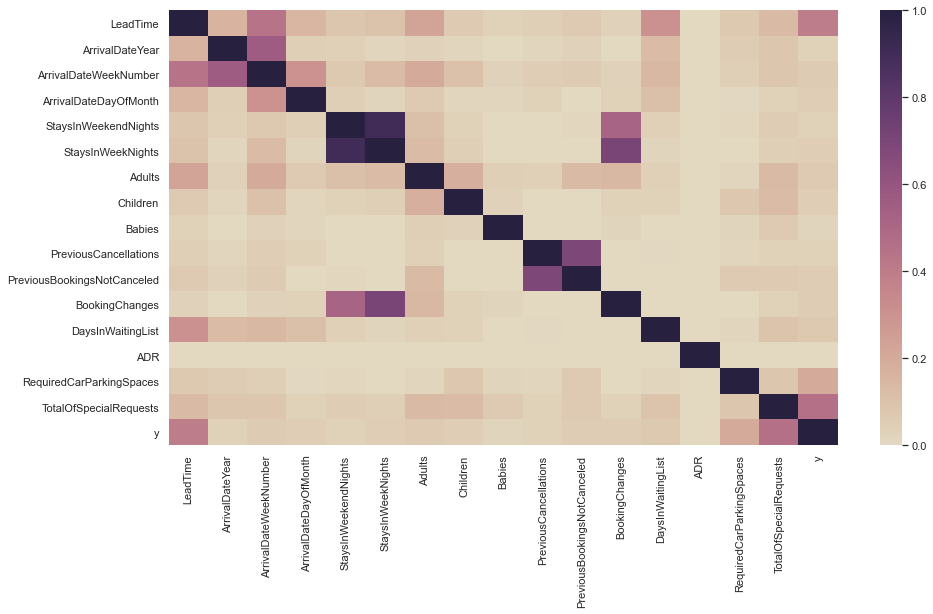

In [94]:
sns.heatmap(df[metric_features_Y].phik_matrix(),cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [80]:
non_metric_features_Y = small_features2+ ["y"]

interval columns not set, guessing: ['IsRepeatedGuest', 'y']


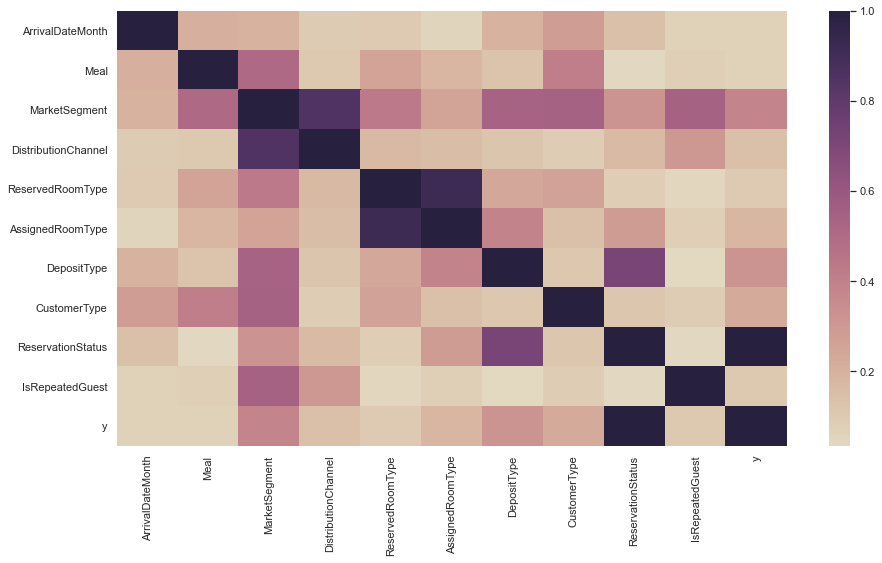

In [95]:
sns.heatmap(df[non_metric_features_Y].phik_matrix(), cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [254]:
#Drop "ReservationStatus" because highly correlated as it the same as our target

In [256]:
df.drop(['ReservationStatus'], axis=1, inplace=True)

## Data Cleaning

In [ ]:
#drop "Company" - 95 % is NULL

In [93]:
75641/79330

0.9534980461363923

In [110]:
df.drop(['Company'], axis=1, inplace=True)

In [111]:
df.head()

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,0,No Deposit,6,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,0,No Deposit,9,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,0,No Deposit,9,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,0,No Deposit,9,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,0,No Deposit,9,0,Transient,76.5,0,1,Canceled,2015-04-02


### Missing Value

In [ ]:
# Country with the most Canceled = Portugal 
# Put PRT in Country for Nan 

In [112]:
df[df["Country"].isna()]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
4831,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4832,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4833,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4834,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4835,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4836,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4837,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4838,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4839,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16
4841,1,193,2015,October,42,15,0,3,2,0.0,...,0,Non Refund,12,0,Transient,65.0,0,0,Canceled,2015-09-16


In [113]:
df['Country'].fillna(df['Country'].mode()[0], inplace = True)

In [114]:
#Children with 4 NaN
# Replace NaN with mode : 0

In [115]:
df[df["Children"].isna()]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
540,1,2,2015,August,32,3,1,0,2,NaN,...,0,No Deposit,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
607,1,1,2015,August,32,5,0,2,2,NaN,...,0,No Deposit,14,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
619,1,1,2015,August,32,5,0,2,3,NaN,...,0,No Deposit,NULL,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
1100,1,8,2015,August,33,13,2,5,2,NaN,...,0,No Deposit,9,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [116]:
df['Children'].fillna(df['Children'].mode()[0], inplace = True)

In [117]:
df.isna().sum()

y                              0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [118]:
df[df['Agent']=="       NULL"]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
47,1,79,2015,July,28,7,0,3,2,0.0,...,0,No Deposit,NULL,0,Transient,37.33,0,1,Canceled,2015-06-16
50,1,63,2015,July,28,7,2,5,2,0.0,...,0,No Deposit,NULL,0,Transient-Party,45.00,0,1,Canceled,2015-07-07
51,1,63,2015,July,28,7,2,5,2,0.0,...,2,No Deposit,NULL,0,Transient-Party,45.00,0,1,Canceled,2015-07-07
134,1,0,2015,July,29,15,0,1,2,0.0,...,0,No Deposit,NULL,0,Transient,0.00,0,0,Canceled,2015-07-15
139,0,0,2015,July,29,15,2,5,2,0.0,...,4,No Deposit,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79064,0,0,2017,August,35,29,0,1,1,0.0,...,0,No Deposit,NULL,0,Transient,0.00,0,2,Check-Out,2017-08-30
79091,0,0,2017,August,35,29,0,1,2,2.0,...,0,No Deposit,NULL,0,Transient,270.00,0,0,Check-Out,2017-08-30
79106,0,0,2017,August,35,30,0,1,1,0.0,...,0,No Deposit,NULL,0,Transient,140.00,0,0,Check-Out,2017-08-31
79155,0,2,2017,August,35,31,0,1,1,0.0,...,0,No Deposit,NULL,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [119]:
df['Agent'].replace("       NULL", np.nan, inplace=True)

In [120]:
# Fill NULL values with 0. Interpret as customer that didn't book through a travel agent 
df["Agent"].isna().sum()
df['Agent'].fillna(0, inplace = True)

In [121]:
df["Agent"].isna().sum()

0

### Outliers

In [ ]:
# Babies Outliers - 10, 9 - to be deleted or fill with 0 

In [128]:
df['Babies'].value_counts()

0     78961
1       361
2         6
10        1
9         1
Name: Babies, dtype: int64

In [131]:
df[df["Babies"]==10]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
6559,0,37,2016,January,3,12,0,2,2,0.0,...,1,No Deposit,9,0,Transient,84.45,0,1,Check-Out,2016-01-14


In [133]:
df.drop(6559, inplace=True)

In [134]:
df[df["Babies"]==9]

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
38596,0,11,2015,October,42,11,2,1,1,0.0,...,1,No Deposit,95,0,Transient-Party,95.0,0,0,Check-Out,2015-10-14


In [136]:
df.drop(38596, inplace=True)

KeyError: '[38596] not found in axis'

In [138]:
df

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,0,No Deposit,6,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,0,No Deposit,9,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,0,No Deposit,9,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,0,No Deposit,9,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,0,No Deposit,9,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Feature Engineering 

In [272]:
df_ = df.copy()

In [273]:
#Turn Agent into Binary : (1) customer used a company / Agent to do the booking 
# (0) customer didn't use a third party

In [274]:
df_['Agent'] = df_['Agent'].map(lambda x: 1 if x != 0 else 0)

In [275]:
df_

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,0.00,0,0,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,1,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,68.00,0,1,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,2,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,1,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,96.14,0,0,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,1,0,Transient,225.43,0,2,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,1,0,Transient,157.71,0,4,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,104.40,0,0,2017-09-07


In [276]:
months = ["January", "February", "March", "April", "May","June","July","August","September","October","November","December"]

In [277]:
df_['ArrivalDateMonth'] = pd.Categorical(df_['ArrivalDateMonth'], categories=months, ordered=True)

In [278]:
df_.sort_values(by =['ArrivalDateMonth'], inplace=True)

In [279]:
df_

,y,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
22886,1,61,2017,January,4,25,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,80.00,0,0,2016-11-25
6712,0,151,2016,January,4,19,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,1,63,Transient-Party,71.00,0,0,2016-01-21
6711,0,151,2016,January,4,19,0,2,2,0.0,0,BB,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,4,No Deposit,1,63,Transient-Party,86.50,0,0,2016-01-21
6710,0,151,2016,January,4,19,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,1,63,Transient-Party,70.00,0,0,2016-01-21
6709,0,151,2016,January,4,19,0,2,1,0.0,0,BB,LVA,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,1,63,Transient-Party,70.00,0,0,2016-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63923,0,269,2016,December,53,29,2,3,1,0.0,0,BB,SWE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient-Party,70.00,0,0,2017-01-03
63922,0,269,2016,December,53,29,2,3,1,0.0,0,BB,SWE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient-Party,70.00,0,0,2017-01-03
63921,0,269,2016,December,53,29,2,3,1,0.0,0,BB,SWE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient-Party,70.00,0,0,2017-01-03
63929,0,99,2016,December,53,31,2,1,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,141.67,0,3,2017-01-03


In [280]:
#df_.drop(columns = {'month_index'}, inplace= True)

In [281]:
# Turn Month string into number month 

In [282]:
# create mapping
d = dict((v,k) for k,v in zip(range(1, 13), df_.ArrivalDateMonth.unique()))
# create column
df_['month_index'] = df_['ArrivalDateMonth'].map(d)

In [283]:
df_.groupby('ArrivalDateMonth')['month_index'].unique()

ArrivalDateMonth
January        [1]
Categories (1, int64): [1]
February       [2]
Categories (1, int64): [2]
March          [3]
Categories (1, int64): [3]
April          [4]
Categories (1, int64): [4]
May            [5]
Categories (1, int64): [5]
June           [6]
Categories (1, int64): [6]
July           [7]
Categories (1, int64): [7]
August         [8]
Categories (1, int64): [8]
September      [9]
Categories (1, int64): [9]
October      [10]
Categories (1, int64): [10]
November     [11]
Categories (1, int64): [11]
December     [12]
Categories (1, int64): [12]
Name: month_index, dtype: object

In [284]:
df_.drop(columns = {'ArrivalDateMonth'}, inplace = True)

In [285]:
df_.rename(columns = {"month_index" : "ArrivalDateMonth"}, inplace=True)

In [286]:
df_.sort_index()

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,ArrivalDateMonth
0,0,6,2015,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,0.00,0,0,2015-07-03,7
1,1,88,2015,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,1,2015-07-01,7
2,1,65,2015,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,68.00,0,1,2015-04-30,7
3,1,92,2015,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,2,2015-06-23,7
4,1,100,2015,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.50,0,1,2015-04-02,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,96.14,0,0,2017-09-06,8
79326,0,102,2017,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,1,0,Transient,225.43,0,2,2017-09-07,8
79327,0,34,2017,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,1,0,Transient,157.71,0,4,2017-09-07,8
79328,0,109,2017,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,104.40,0,0,2017-09-07,8


In [287]:
# One Hot Encoding : Meal, Market segment, DistributionChannel, DepositType, etc

In [288]:
non_metric_features.remove("Country")
non_metric_features.remove("ReservationStatusDate")
non_metric_features.remove("Agent")
non_metric_features.remove("IsRepeatedGuest")
non_metric_features.remove("ArrivalDateMonth")

ValueError: list.remove(x): x not in list

In [290]:
non_metric_features.remove("ReservationStatus")

In [291]:
df_encoded = pd.get_dummies(df[non_metric_features])
df_encoded.head()

,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,AssignedRoomType_A,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [292]:
pd.set_option('display.max_columns', None)
df_clean = pd.concat([df_,df_encoded],axis = 1)
df_clean.head()

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,ArrivalDateMonth,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,AssignedRoomType_A,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,6,2015,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,0.0,0,0,2015-07-03,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,88,2015,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.5,0,1,2015-07-01,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,65,2015,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,68.0,0,1,2015-04-30,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,92,2015,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.5,0,2,2015-06-23,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,100,2015,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,76.5,0,1,2015-04-02,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [295]:
df_clean.drop(columns = {"Meal","Country","MarketSegment","DistributionChannel", "ReservedRoomType","AssignedRoomType",
                        "DepositType","CustomerType","ReservationStatusDate"}, axis=1, inplace=True)

In [296]:
df_clean

,y,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ArrivalDateMonth,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,AssignedRoomType_A,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,6,2015,27,1,0,2,1,0.0,0,0,0,0,0,1,0,0.00,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,88,2015,27,1,0,4,2,0.0,0,0,0,0,0,1,0,76.50,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,65,2015,27,1,0,4,1,0.0,0,0,0,0,0,1,0,68.00,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,92,2015,27,1,2,4,2,0.0,0,0,0,0,0,1,0,76.50,0,2,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,100,2015,27,2,0,2,2,0.0,0,0,0,0,0,1,0,76.50,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,1,0,96.14,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
79326,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,1,0,225.43,0,2,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
79327,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,1,0,157.71,0,4,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
79328,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,1,0,104.40,0,0,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Feature Selection

In [303]:
data = df_clean.drop(columns = {"y"}, axis=1)

In [297]:
target = df_clean["y"]

In [307]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=5, stratify=target)

In [335]:
def select_features(X_train, y_train, X_test, score_type, feat, name):
    if score_type=='chi2':
        fs = SelectKBest(score_func=chis2, k=feat)
    elif score_type=='mutual_info_class':
        fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    #print the score for the features
    for i in range(len(fs.scores_)):
        print('Feature {} {}: Score {}'.format(i, name[i], fs.scores_[i]))
    #plot scores as a graph bar
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.title('Feature Importance: ', size=25)
    plt.show()
    return X_train_fs, X_test_fs

Feature 0 LeadTime: Score 666403.5920279489
Feature 1 ArrivalDateYear: Score 0.00011093438042830299
Feature 2 ArrivalDateWeekNumber: Score 3.8549335175238886
Feature 3 ArrivalDateDayOfMonth: Score 20.46798014301771
Feature 4 StaysInWeekendNights: Score 2.2794555635875393
Feature 5 StaysInWeekNights: Score 168.44649790284677
Feature 6 Adults: Score 26.82060847799739
Feature 7 Children: Score 62.806903094459564
Feature 8 Babies: Score 67.91457251461316
Feature 9 IsRepeatedGuest: Score 295.41438008676556
Feature 10 PreviousCancellations: Score 3781.455764132551
Feature 11 PreviousBookingsNotCanceled: Score 3723.4835768966595
Feature 12 BookingChanges: Score 2793.196468777872
Feature 13 Agent: Score 26.986686724862032
Feature 14 DaysInWaitingList: Score 30786.13492550134
Feature 15 ADR: Score 211.98111482100566
Feature 16 RequiredCarParkingSpaces: Score 1096.3038046564452
Feature 17 TotalOfSpecialRequests: Score 5929.801554468615
Feature 18 ArrivalDateMonth: Score 3.0402134135635746
Featur

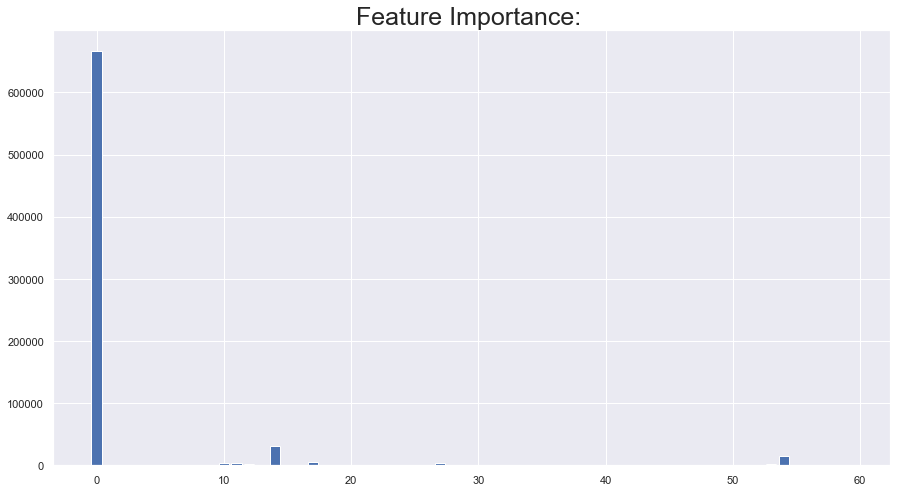

(array([[130, 2016, 16, ..., 0, 1, 0],
        [262, 2017, 33, ..., 0, 1, 0],
        [175, 2017, 33, ..., 0, 1, 0],
        ...,
        [29, 2016, 11, ..., 0, 1, 0],
        [0, 2016, 48, ..., 0, 1, 0],
        [20, 2017, 6, ..., 0, 1, 0]], dtype=object),
 array([[9, 2016, 34, ..., 0, 1, 0],
        [29, 2017, 33, ..., 0, 0, 1],
        [71, 2016, 15, ..., 0, 0, 1],
        ...,
        [279, 2017, 3, ..., 0, 1, 0],
        [587, 2017, 7, ..., 0, 1, 0],
        [251, 2017, 3, ..., 0, 1, 0]], dtype=object))

In [336]:
select_features(X_train, y_train, X_test, 'chi2', 'all', col1)

In [340]:
columns = pd.DataFrame(data.columns)

In [330]:
col1 = columns[0].tolist()

'StaysInWeekendNights'

Feature 0 LeadTime: Score 666403.5920279489
Feature 1 ArrivalDateYear: Score 0.00011093438042830299
Feature 2 ArrivalDateWeekNumber: Score 3.8549335175238886
Feature 3 ArrivalDateDayOfMonth: Score 20.46798014301771
Feature 4 StaysInWeekendNights: Score 2.2794555635875393
Feature 5 StaysInWeekNights: Score 168.44649790284677
Feature 6 Adults: Score 26.82060847799739
Feature 7 Children: Score 62.806903094459564
Feature 8 Babies: Score 67.91457251461316
Feature 9 IsRepeatedGuest: Score 295.41438008676556
Feature 10 PreviousCancellations: Score 3781.455764132551
Feature 11 PreviousBookingsNotCanceled: Score 3723.4835768966595
Feature 12 BookingChanges: Score 2793.196468777872
Feature 13 Agent: Score 26.986686724862032
Feature 14 DaysInWaitingList: Score 30786.13492550134
Feature 15 ADR: Score 211.98111482100566
Feature 16 RequiredCarParkingSpaces: Score 1096.3038046564452
Feature 17 TotalOfSpecialRequests: Score 5929.801554468615
Feature 18 ArrivalDateMonth: Score 3.0402134135635746
Featur

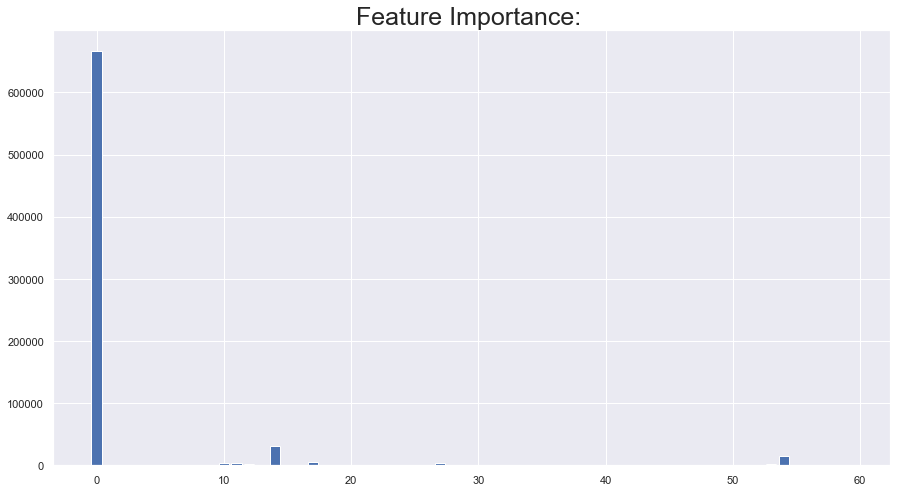

(array([[130, 2016, 16, ..., 0, 1, 0],
        [262, 2017, 33, ..., 0, 1, 0],
        [175, 2017, 33, ..., 0, 1, 0],
        ...,
        [29, 2016, 11, ..., 0, 1, 0],
        [0, 2016, 48, ..., 0, 1, 0],
        [20, 2017, 6, ..., 0, 1, 0]], dtype=object),
 array([[9, 2016, 34, ..., 0, 1, 0],
        [29, 2017, 33, ..., 0, 0, 1],
        [71, 2016, 15, ..., 0, 0, 1],
        ...,
        [279, 2017, 3, ..., 0, 1, 0],
        [587, 2017, 7, ..., 0, 1, 0],
        [251, 2017, 3, ..., 0, 1, 0]], dtype=object))

In [338]:
#Chi-Square
select_features(X_train, y_train, X_test, 'chi2', 'all', col1)

Feature 0 LeadTime: Score 0.09987085838555587
Feature 1 ArrivalDateYear: Score 0.0021671742373992053
Feature 2 ArrivalDateWeekNumber: Score 0.0039016591237741594
Feature 3 ArrivalDateDayOfMonth: Score 0.0010258490568817447
Feature 4 StaysInWeekendNights: Score 0.003191719356011813
Feature 5 StaysInWeekNights: Score 0.007110010548960766
Feature 6 Adults: Score 0.005264539577841898
Feature 7 Children: Score 0.003052259836034299
Feature 8 Babies: Score 0.00237205019914688
Feature 9 IsRepeatedGuest: Score 0.002638419618020249
Feature 10 PreviousCancellations: Score 0.04638077531864915
Feature 11 PreviousBookingsNotCanceled: Score 0.008228294023651328
Feature 12 BookingChanges: Score 0.019988725941258334
Feature 13 Agent: Score 0.009434746400998506
Feature 14 DaysInWaitingList: Score 0.01755815482972367
Feature 15 ADR: Score 0.09077164786462566
Feature 16 RequiredCarParkingSpaces: Score 0.013501653159302851
Feature 17 TotalOfSpecialRequests: Score 0.05790386558061633
Feature 18 ArrivalDateM

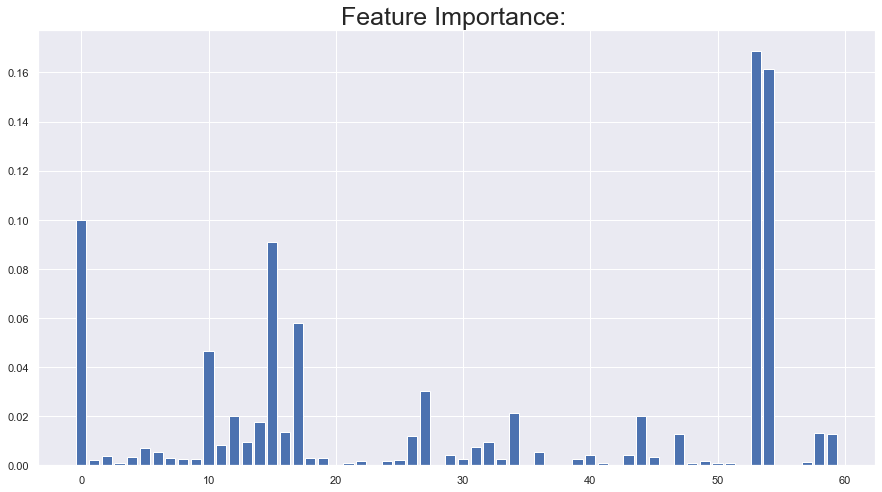

(array([[130, 2016, 16, ..., 0, 1, 0],
        [262, 2017, 33, ..., 0, 1, 0],
        [175, 2017, 33, ..., 0, 1, 0],
        ...,
        [29, 2016, 11, ..., 0, 1, 0],
        [0, 2016, 48, ..., 0, 1, 0],
        [20, 2017, 6, ..., 0, 1, 0]], dtype=object),
 array([[9, 2016, 34, ..., 0, 1, 0],
        [29, 2017, 33, ..., 0, 0, 1],
        [71, 2016, 15, ..., 0, 0, 1],
        ...,
        [279, 2017, 3, ..., 0, 1, 0],
        [587, 2017, 7, ..., 0, 1, 0],
        [251, 2017, 3, ..., 0, 1, 0]], dtype=object))

In [339]:
#Mutual Information Classification
select_features(X_train, y_train, X_test, 'mutual_info_class', 'all', col1)

In [343]:
# RFE feature selection. 
def rfe_group(data, target):
    nof_list=np.arange(1,len(data.columns)+1)  
    high_score=0
    nof=0           
    score_list =[]
    #dividing the data sets into train and validation. 
    for n in range(len(nof_list)):
        X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.2, random_state = 0,stratify = target)     
        #Selecting the model for the Feature selection.
        model = LogisticRegression()
        rfe = RFE(model,nof_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        
        score = model.score(X_test_rfe,y_test)
        score_list.append(score)

        if(score>high_score):
            high_score = score
            nof = nof_list[n]
    print('Optimum Number of Features: %d' %nof)
    print('\n')
    print('Score with %d features: %f' % (nof, high_score))
    rfe = RFE(estimator = model, n_features_to_select = nof)
    X_rfe = rfe.fit_transform(X = data, y = target)
    model = LogisticRegression().fit(X = X_rfe,y = target)
    selected_features = pd.Series(rfe.support_, index = data.columns)
    print(selected_features)
    ridge = RidgeClassifierCV().fit(X = data,y = target)
    coef_ridge = pd.Series(ridge.coef_[0], index = data.columns)
    return coef_ridg

In [344]:
rfe_group(data, target)

KeyboardInterrupt: 

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(12,10))
    imp_coef.plot(kind = 'barh')
    plt.title('Feature Importance: ' + name, size=20)
    plt.show()

In [36]:
small_features = ["Babies", "PreviousCancellations","PreviousBookingsNotCanceled",
                  "BookingChanges","ADR","DaysInWaitingList","RequiredCarParkingSpaces"]

Executing shutdown due to inactivity...


2021-03-09 20:23:08,878 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-03-09 20:23:09,100 - INFO     - Executing shutdown...


In [12]:
# ReservationStatusDate DATE TYPE - either turn to day or DEL

['ArrivalDateMonth',
 'Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'ReservationStatus',
 'ReservationStatusDate',
 'IsRepeatedGuest']

In [50]:
non_metric_features

['ArrivalDateMonth',
 'Meal',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'CustomerType',
 'ReservationStatus',
 'IsRepeatedGuest']

In [14]:
metric_features.append("y")

NumExpr defaulting to 4 threads.


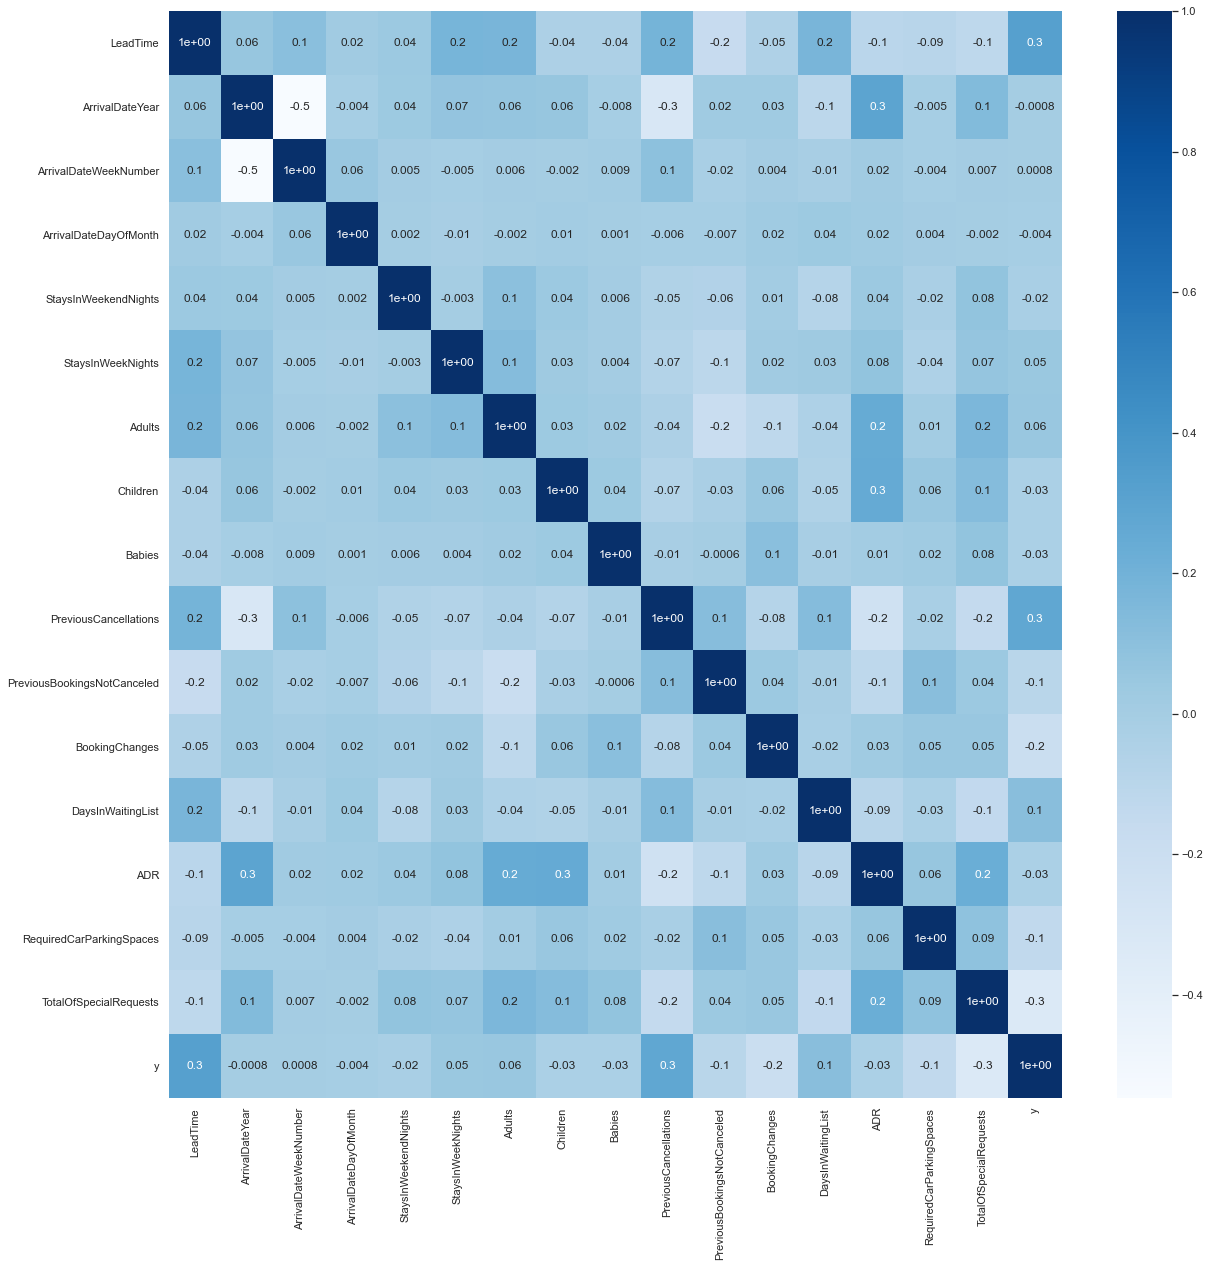

In [15]:
def cor_heatmap(cor):
    plt.figure(figsize=(20,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1')
    plt.show()  

# HeatMap of Metric features 
cor_all = df[metric_features].corr(method = "spearman")
cor_heatmap(cor_all)

In [70]:
metric_features_Y = metric_features + ["y"]

interval columns not set, guessing: ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'y']


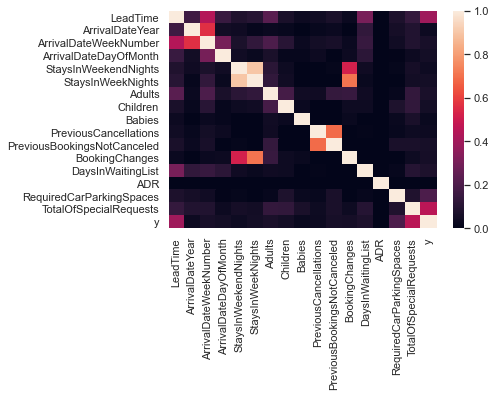

In [108]:
sns.heatmap(df[metric_features_Y].phik_matrix())

In [109]:
non_metric_features_Y = non_metric_features + ["y"]

interval columns not set, guessing: ['y']


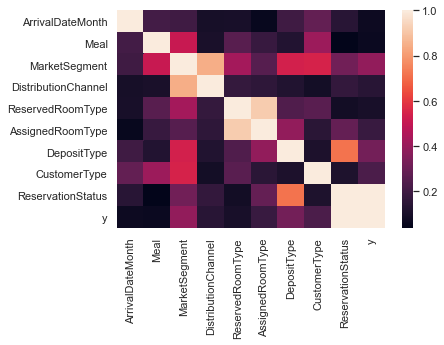

In [110]:
non_metric_features_Y = non_metric_features + ["y"]
sns.heatmap(df[non_metric_features_Y].phik_matrix())